In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from tensorflow import keras
from tensorflow.keras import datasets,layers,optimizers,Sequential,metrics

In [2]:
(x,y),(x_test,y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(x.shape,y.shape) 

(60000, 28, 28) (60000,)


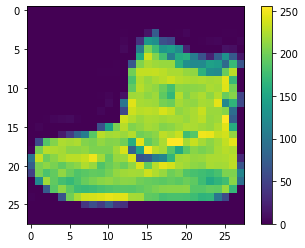

In [4]:
plt.figure()
plt.imshow(x[0])
plt.colorbar()
plt.grid(False)

In [5]:
def feature_scale(x,y):
  x = tf.cast(x,dtype=tf.float32)/255.
  y = tf.cast(y,dtype=tf.int32)
  return x,y

In [6]:
data = tf.data.Dataset.from_tensor_slices((x,y))
data = data.map(feature_scale).shuffle(10000).batch(128)

data_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
data_test = data_test.map(feature_scale).shuffle(10000).batch(128)

In [7]:
data_iter = iter(data)

In [8]:
samples = next(data_iter)
print(samples[0].shape,samples[1].shape)

(128, 28, 28) (128,)


In [9]:
model = Sequential([
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(10,activation=tf.nn.relu)
])

In [10]:
model.build(input_shape=[None,28*28])

model.summary()
optimizer = optimizers.Adam()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  8256      
_________________________________________________________________
dense_3 (Dense)              multiple                  2080      
_________________________________________________________________
dense_4 (Dense)              multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [11]:
for i in range(10):
  for step,(x,y) in enumerate(data):
    x = tf.reshape(x,[-1,28*28])
    with tf.GradientTape() as tape:
      logits = model(x)
      y_one_hot = tf.one_hot(y,depth=10)
      loss = tf.losses.categorical_crossentropy(y_one_hot,logits,from_logits=True)
      loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))
    
    if step %100==0:
      print(i,step,'loss:',float(loss))

0 0 loss: 2.336238384246826
0 100 loss: 0.7447859048843384
0 200 loss: 0.5409673452377319
0 300 loss: 0.5613892078399658
0 400 loss: 0.43953248858451843
1 0 loss: 0.3981860280036926
1 100 loss: 0.3619774281978607
1 200 loss: 0.2441524863243103
1 300 loss: 0.40071532130241394
1 400 loss: 0.29362720251083374
2 0 loss: 0.30181241035461426
2 100 loss: 0.36154285073280334
2 200 loss: 0.30537623167037964
2 300 loss: 0.26920458674430847
2 400 loss: 0.3014677166938782
3 0 loss: 0.2664702534675598
3 100 loss: 0.4127298891544342
3 200 loss: 0.23406484723091125
3 300 loss: 0.2942761778831482
3 400 loss: 0.27292847633361816
4 0 loss: 0.21730270981788635
4 100 loss: 0.3115699887275696
4 200 loss: 0.2619813084602356
4 300 loss: 0.22510990500450134
4 400 loss: 0.2980996370315552
5 0 loss: 0.2171342670917511
5 100 loss: 0.23109760880470276
5 200 loss: 0.2701130509376526
5 300 loss: 0.2175772786140442
5 400 loss: 0.34604594111442566
6 0 loss: 0.22588390111923218
6 100 loss: 0.322609007358551
6 200 loss

In [12]:
total_loss = 0
total_num=0
for x,y in data_test:
  
  x = tf.reshape(x,[-1,28*28])
  
  gd = model(x)
  prob = tf.nn.softmax(gd,axis=1)
  pred = tf.argmax(prob,axis=1)
  
  pred = tf.cast(pred,dtype=tf.int32)
  correct = tf.equal(pred,y)
  
  result = tf.reduce_sum(tf.cast(correct,dtype=tf.int32))
  
  total_loss += int(result)
  total_num += x.shape[0]
  
acc = total_loss/total_num

In [13]:
acc

0.8883